In [43]:
# pip install -U scikit-learn

# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [44]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [45]:
pd.set_option('display.max_colwidth', None)

In [46]:
stop_words = set(stopwords.words('spanish'))

In [47]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [48]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_labeled_corregido.csv', sep = ',')

In [49]:
tweets_df.shape

(296, 6)

In [50]:
tweets_df.head()

,full_text,sentiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,@Nata_Salud @Sandrag69 @AndresMejiaV ¡Hola Natalia! Te invitamos a descubrir tu #MatchPresidencial aquí: https://t.co/0E1tZKypTK,neutral,NaN,NaN,NaN,NaN
1,@supershadai @Registraduria Quien o que institución en Colombia atiende los reclamos al fraude electoral?\nPorque no suspender a al registrador que ya la defeco en las elecciones de senado y camara.\nHay una desconfianza general en cuanto a las presidenciales.\nEstán provocando una respuesta violenta.,negative,NaN,NaN,NaN,NaN
2,@BOLIBAR2 @AndresPastrana_ @santiagoangelp Un poco tarde con las elecciones encima… mal para Colombia,negative,NaN,NaN,NaN,NaN
3,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",negative,NaN,NaN,NaN,NaN
4,"@BOLIBAR2 @CNE_COLOMBIA @AndresPastrana_ Aquí no va a pasar nada, y petro de va a robar las elecciones presidenciales y el país",negative,NaN,NaN,NaN,NaN


In [51]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative                                                                                                                                 0.668919
neutral                                                                                                                                  0.266892
positive                                                                                                                                 0.054054
an las elecciones para este 29 de mayo eso es lo único que hace este NARCOGOBIERNO FAVORECER A PARAMILITARES Y LAS MAFIAS EN COLOMBIA    0.003378
 ya conocemos su accionar                                                                                                                0.003378
 ojalá se respete la voluntad de los pueblos de la Patria Grande =&gt                                                                    0.003378
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [52]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [53]:
tweets_labeled_df.shape

(296, 6)

In [54]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [55]:
tweets_unlabeled_df.shape

(0, 6)

In [56]:
# Scenario 1: Working with all classes

# Scenario 2: Working only with positive and negative classes
# Removing neutral class
tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

# Scenario 3: Treating neutral as positive classes
#tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [57]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.25 , stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [58]:
X_train.shape

(160,)

In [59]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.925
positive    0.075
Name: sentiment, dtype: float64

In [60]:
X_test.shape

(54,)

In [61]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.925926
positive    0.074074
Name: sentiment, dtype: float64

### Vectorizing texts

In [62]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [63]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [64]:
X_bow = bow.fit_transform(X_train)

In [65]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [66]:
model = RandomForestClassifier()

In [67]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [68]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

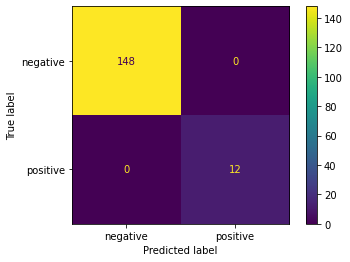

In [69]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

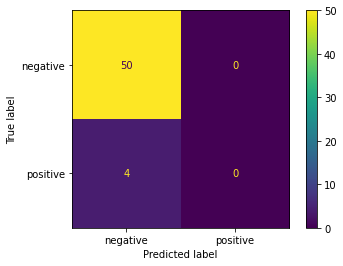

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [71]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.92592593 0.        ]
Recall: [1. 0.]
F1: [0.96153846 0.        ]


/home/landrux/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training and evaluating a model using TF-IDF

In [72]:
model = RandomForestClassifier()

In [73]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [74]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(tfidf.transform(X_test))

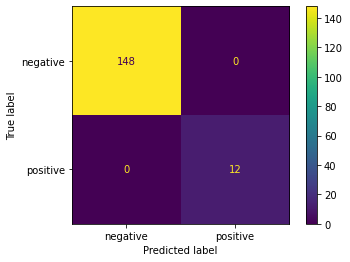

In [75]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

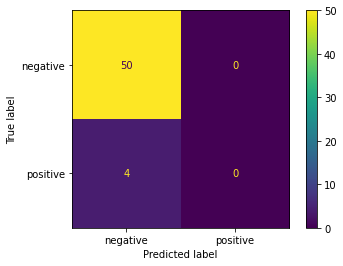

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [77]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.92592593 0.        ]
Recall: [1. 0.]
F1: [0.96153846 0.        ]


/home/landrux/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### How interpret the results?

### Analyzing errors of model using BOW

In [78]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [79]:
error_df.shape

(54, 3)

In [80]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(10)

,full_text,actual,predicted
19,Eso sabe ;)\nAdelante #PetroPresidente2022 \nhttps://t.co/xscQ26b62m https://t.co/NIJNT0Sms7,positive,negative
20,AMÉRICA LATINA\nGolpe al uribismo y avance de la izquierda\na semanas de las elecciones en Colombia - \nhttps://t.co/DsJ3kKO3b6,positive,negative
28,🇨🇴 La calificadora de riesgos le mantuvo a #Colombia su calificación crediticia confiando en que su estabilidad macroeconómica se mantendrá una vez elija nuevo presidente: https://t.co/Ajf3jcFhdX,positive,negative
29,"El Liverpool del colombiano Luis Diáz disputará la final de la Champions League el 28 de mayo, justo un día antes de las elecciones en Colombia. https://t.co/zpfUPNuImf",positive,negative


In [81]:
### Analyzing errors of model using TF-IDF

In [82]:
error_df1 = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_tfidf_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df1.drop('index', inplace = True, axis = 1)

In [83]:
error_df1.shape

(54, 3)

In [84]:
error_df1.loc[error_df1['actual'] != error_df1['predicted']].head(10)

,full_text,actual,predicted
19,Eso sabe ;)\nAdelante #PetroPresidente2022 \nhttps://t.co/xscQ26b62m https://t.co/NIJNT0Sms7,positive,negative
20,AMÉRICA LATINA\nGolpe al uribismo y avance de la izquierda\na semanas de las elecciones en Colombia - \nhttps://t.co/DsJ3kKO3b6,positive,negative
28,🇨🇴 La calificadora de riesgos le mantuvo a #Colombia su calificación crediticia confiando en que su estabilidad macroeconómica se mantendrá una vez elija nuevo presidente: https://t.co/Ajf3jcFhdX,positive,negative
29,"El Liverpool del colombiano Luis Diáz disputará la final de la Champions League el 28 de mayo, justo un día antes de las elecciones en Colombia. https://t.co/zpfUPNuImf",positive,negative
